In [6]:
import sklearn as sk
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

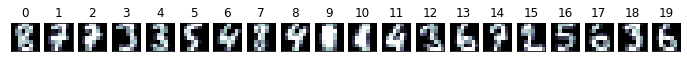

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))
for i in range(n_image):
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

In [15]:
ddata

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [12.5, 12.5, 51.25, 51.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [122.5, 122.5, 161.875, 161.875],
  [92.5, 92.5, 142.1875, 142.1875],
  [31.875, 31.875, 117.34375, 117.34375]],
 'dcoord': [[0.0, 28.6705423736629, 28.6705423736629, 0.0],
  [0.0, 37.03151810732762, 37.03151810732762, 28.6705423736629],
  [0.0, 32.54228019054596, 32.54228019054596, 0.0],
  [0.0, 33.36165463522455, 33.36165463522455, 0.0],
  [0.0, 43.255057507764334, 43.255057507764334, 33.36165463522455],
  [32.54228019054596,
   60.168097859247645,
   60.168097859247645,
   43.255057507764334],
  [3

In [16]:
dcoord

array([[ 0.        , 23.51595203, 23.51595203,  0.        ],
       [ 0.        , 25.27844932, 25.27844932,  0.        ],
       [ 0.        , 28.67054237, 28.67054237,  0.        ],
       [ 0.        , 31.04298096, 31.04298096, 25.27844932],
       [ 0.        , 31.51190251, 31.51190251,  0.        ],
       [ 0.        , 32.54228019, 32.54228019,  0.        ],
       [ 0.        , 33.36165464, 33.36165464,  0.        ],
       [ 0.        , 34.51086785, 34.51086785, 31.51190251],
       [ 0.        , 37.03151811, 37.03151811, 28.67054237],
       [ 0.        , 43.25505751, 43.25505751, 33.36165464],
       [ 0.        , 45.31004304, 45.31004304,  0.        ],
       [ 0.        , 45.36151085, 45.36151085, 23.51595203],
       [ 0.        , 53.54437412, 53.54437412, 34.51086785],
       [45.31004304, 56.6892112 , 56.6892112 , 53.54437412],
       [32.54228019, 60.16809786, 60.16809786, 43.25505751],
       [37.03151811, 66.61618922, 66.61618922, 60.16809786],
       [45.36151085, 70.

In [18]:
dcoord[:, 2]

array([23.51595203, 25.27844932, 28.67054237, 31.04298096, 31.51190251,
       32.54228019, 33.36165464, 34.51086785, 37.03151811, 43.25505751,
       45.31004304, 45.36151085, 53.54437412, 56.6892112 , 60.16809786,
       66.61618922, 70.35228813, 80.11172754, 93.57946712])

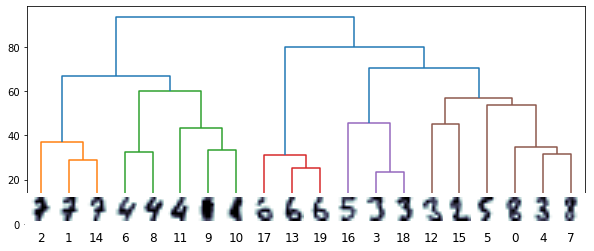

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata['dcoord'])
icoord = np.array(ddata['icoord'])
leaves = np.array(ddata['leaves'])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.show()